# IMAGE BASED SEARCH ENGINE

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from collections import Counter
from gensim.matutils import softcossim
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# OPENING THE VECTOR FILE
vector_file=open("vector_dict.pkl","rb")
vector_dict=pickle.load(vector_file)

In [3]:
# initializing the model
model=ResNet50(weights='imagenet',input_shape=(224,224,3))
new_model=Model(model.input,model.layers[-2].output)

In [4]:
# preprocess input
def preprocess_image(img):
    img=image.load_img(img,target_size=(224,224,3))
    img=image.img_to_array(img)
    img=img.reshape((1,224,224,3))
    img=preprocess_input(img)
    return img
# pr
def cos_similarity(vector,similarity,li):
    for key,value in vector_dict.items():
        val=cosine_similarity(vector,value.reshape((1,-1)))
        similarity[key]=val
    a=Counter(similarity)
    top_10=a.most_common(10)
    for i in range(len(top_10)):
        a,b=top_10[i]
        li.append(a)
    return li
    

In [23]:
def testing(img_path):
    test_image=preprocess_image(img_path)
    test_vector=new_model.predict(test_image)
    test_vector=test_vector.reshape((1,-1))
    similarity={}
    li=[]
    top_10=cos_similarity(test_vector,similarity,li)
    fig=plt.figure(figsize=(15,15))
    columns=5
    rows=2
    for i in range(1,11):
        path="./combined data/"+li[i-1]
        img=image.load_img(path)
        fig.add_subplot(rows,columns,i)
        plt.imshow(img)
    
    plt.show()
    

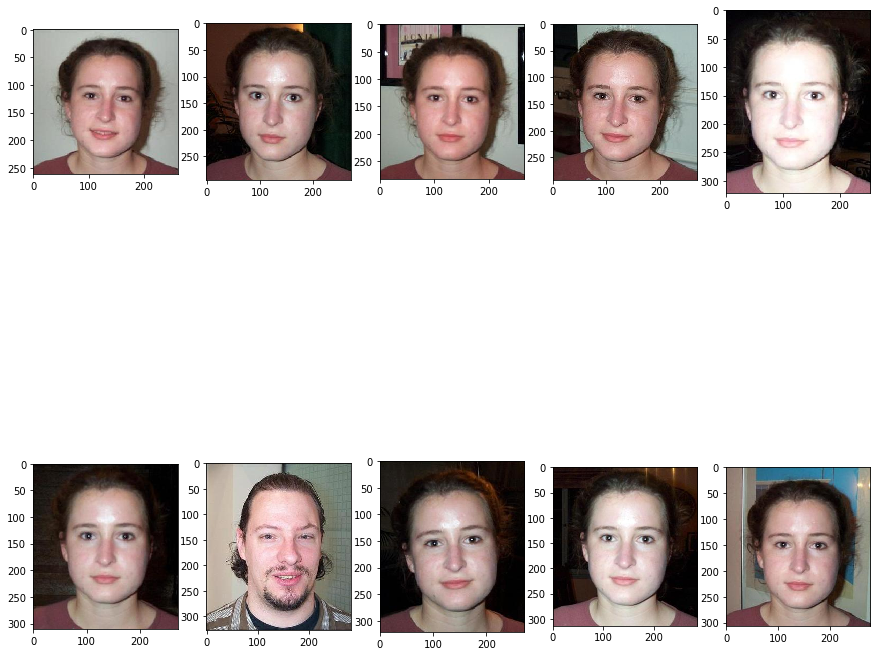

In [25]:
testimage="./test images/faces.jpg"
testing(testimage)